In [1]:
import gizmo_analysis as gizmo
import matplotlib.pyplot as plt
from matplotlib import colors
import asdf
import numpy as np

loading data

In [2]:
af = asdf.open('m12i_symmetry_axes.asdf')

af.info()

In [4]:
r = af["radius"]
L = af["angular.momentum"]
min_axs = np.array([af["symmetry.axes"][i][2] for i in range(len(af["symmetry.axes"]))])
maj_axs = np.array([af["symmetry.axes"][i][0] for i in range(len(af["symmetry.axes"]))])

def permuteVector(vec, ref):
    if np.dot(ref, vec) < 0.0:
        return -1*np.array(vec)
    else:
        return vec
    
min_axs_corrected = np.array([permuteVector(ax_i, L) for ax_i in min_axs])
maj_axs_corrected = np.array([permuteVector(ax_k, L) for ax_k in maj_axs])

In [5]:
sim_dir = "../../../data/latte_metaldiff/"
sims_name = "m12i_res7100"
part = gizmo.io.Read.read_snapshots(["dark"], "redshift", 0, sim_dir + sims_name, assign_hosts_rotation=True)


# in utilities.simulation.Snapshot():
* reading:  data/latte_metaldiff/m12i_res7100/snapshot_times.txt

* input redshift = 0:  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  data/latte_metaldiff/m12i_res7100/output/snapdir_600/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 70514272 particles
    dark2     (id = 2): 5513331 particles
    gas       (id = 0): 57060074 particles
    star      (id = 4): 13976485 particles
    blackhole (id = 5): 0 particles

* reading species: ['dark']
* reading particles from:
    snapshot_600.0.hdf5
    snapshot_600.1.hdf5
    snapshot_600.2.hdf5
    snapshot_600.3.hdf5

* reading cosmological parameters from:  data/latte_metaldiff/m12i_res7100/initial_condition/ic_agora_m12i.conf

* checking sanity of particle properties


# in gizmo_analysis.gizmo_track.ParticleCoordinate():
  read 1 host (position, velocity, principal axes) from:  data/latt

making the plot

In [6]:
pos_dark = part["dark"].prop("host.distance")

In [7]:
host_minor_ax = part.host["rotation"][0, 2]

In [8]:
scale = 1000
bins = 250
vmax = 10000
vmin = 10
k = 750

In [9]:
xym = (abs(pos_dark[:, 0]) < scale) & (abs(pos_dark[:, 1]) < scale)
xzm = (abs(pos_dark[:, 0]) < scale) & (abs(pos_dark[:, 2]) < scale)
yzm = (abs(pos_dark[:, 1]) < scale) & (abs(pos_dark[:, 2]) < scale)

<timed exec>:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


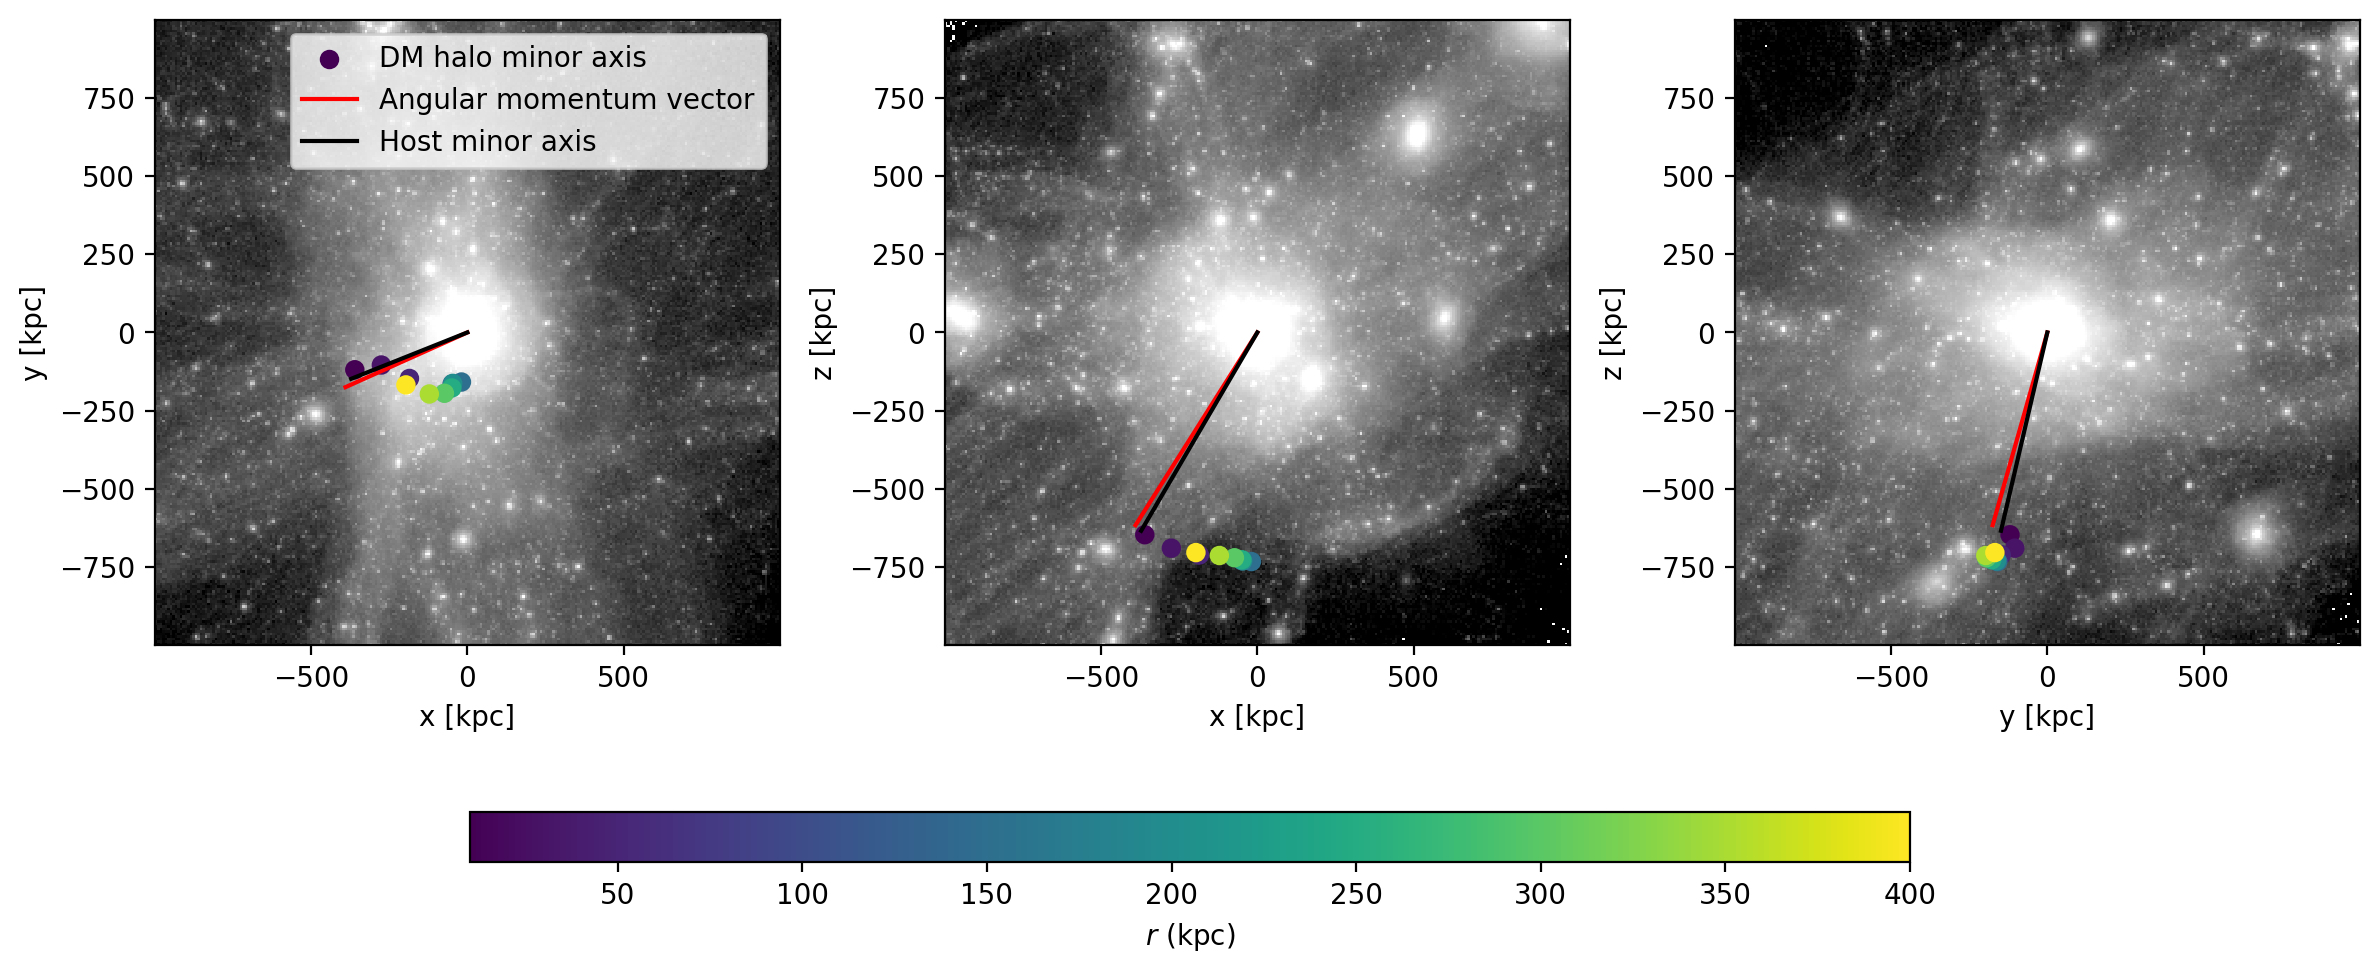

CPU times: user 14.5 s, sys: 7.8 s, total: 22.3 s
Wall time: 22 s


In [15]:
%%time
fig, axs = plt.subplots(1,3,figsize=(12,5), dpi=200)

(xy, xz, yz) = axs

xy.hist2d(
    pos_dark[:, 0][xym],
    pos_dark[:, 1][xym],
    bins=bins,
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
    cmap="binary_r"
)

xz.hist2d(
    pos_dark[:, 0][xzm],
    pos_dark[:, 2][xzm],
    bins=bins,
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
    cmap="binary_r"
)

yz.hist2d(
    pos_dark[:, 1][yzm],
    pos_dark[:, 2][yzm],
    bins=bins,
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
    cmap="binary_r"
)

focus = xy.scatter(
    k*min_axs_corrected[:, 0],
    k*min_axs_corrected[:, 1],
    c=r,
    label="DM halo minor axis"
)

xz.scatter(
    k*min_axs_corrected[:, 0],
    k*min_axs_corrected[:, 2],
    c=r
)

yz.scatter(
    k*min_axs_corrected[:, 1],
    k*min_axs_corrected[:, 2],
    c=r
)

xy.plot(
    [0, k*L[0]],
    [0, k*L[1]],
    c='r',
    label="Angular momentum vector"
)

xz.plot(
    [0, k*L[0]],
    [0, k*L[2]],
    c='r'
)

yz.plot(
    [0, k*L[1]],
    [0, k*L[2]],
    c='r'
)

####

xy.plot(
    [0, k*host_minor_ax[0]],
    [0, k*host_minor_ax[1]],
    c='k',
    label="Host minor axis"
)

xz.plot(
    [0, k*host_minor_ax[0]],
    [0, k*host_minor_ax[2]],
    c='k'
)

yz.plot(
    [0, k*host_minor_ax[1]],
    [0, k*host_minor_ax[2]],
    c='k'
)

xy.set_aspect(1)
xz.set_aspect(1)
yz.set_aspect(1)

xy.set_xlabel("x [kpc]")
xz.set_xlabel("x [kpc]")
yz.set_xlabel("y [kpc]")

xy.set_ylabel("y [kpc]")
xz.set_ylabel("z [kpc]")
yz.set_ylabel("z [kpc]")

cax = fig.add_axes([0.5 - (0.6 / 2), -0.03, 0.6, 0.05])

plt.colorbar(focus, cax=cax, orientation="horizontal", label="$r$ (kpc)")

fig.tight_layout()

xy.legend()

plt.savefig("m12i_density.png", bbox_inches="tight")

plt.show()

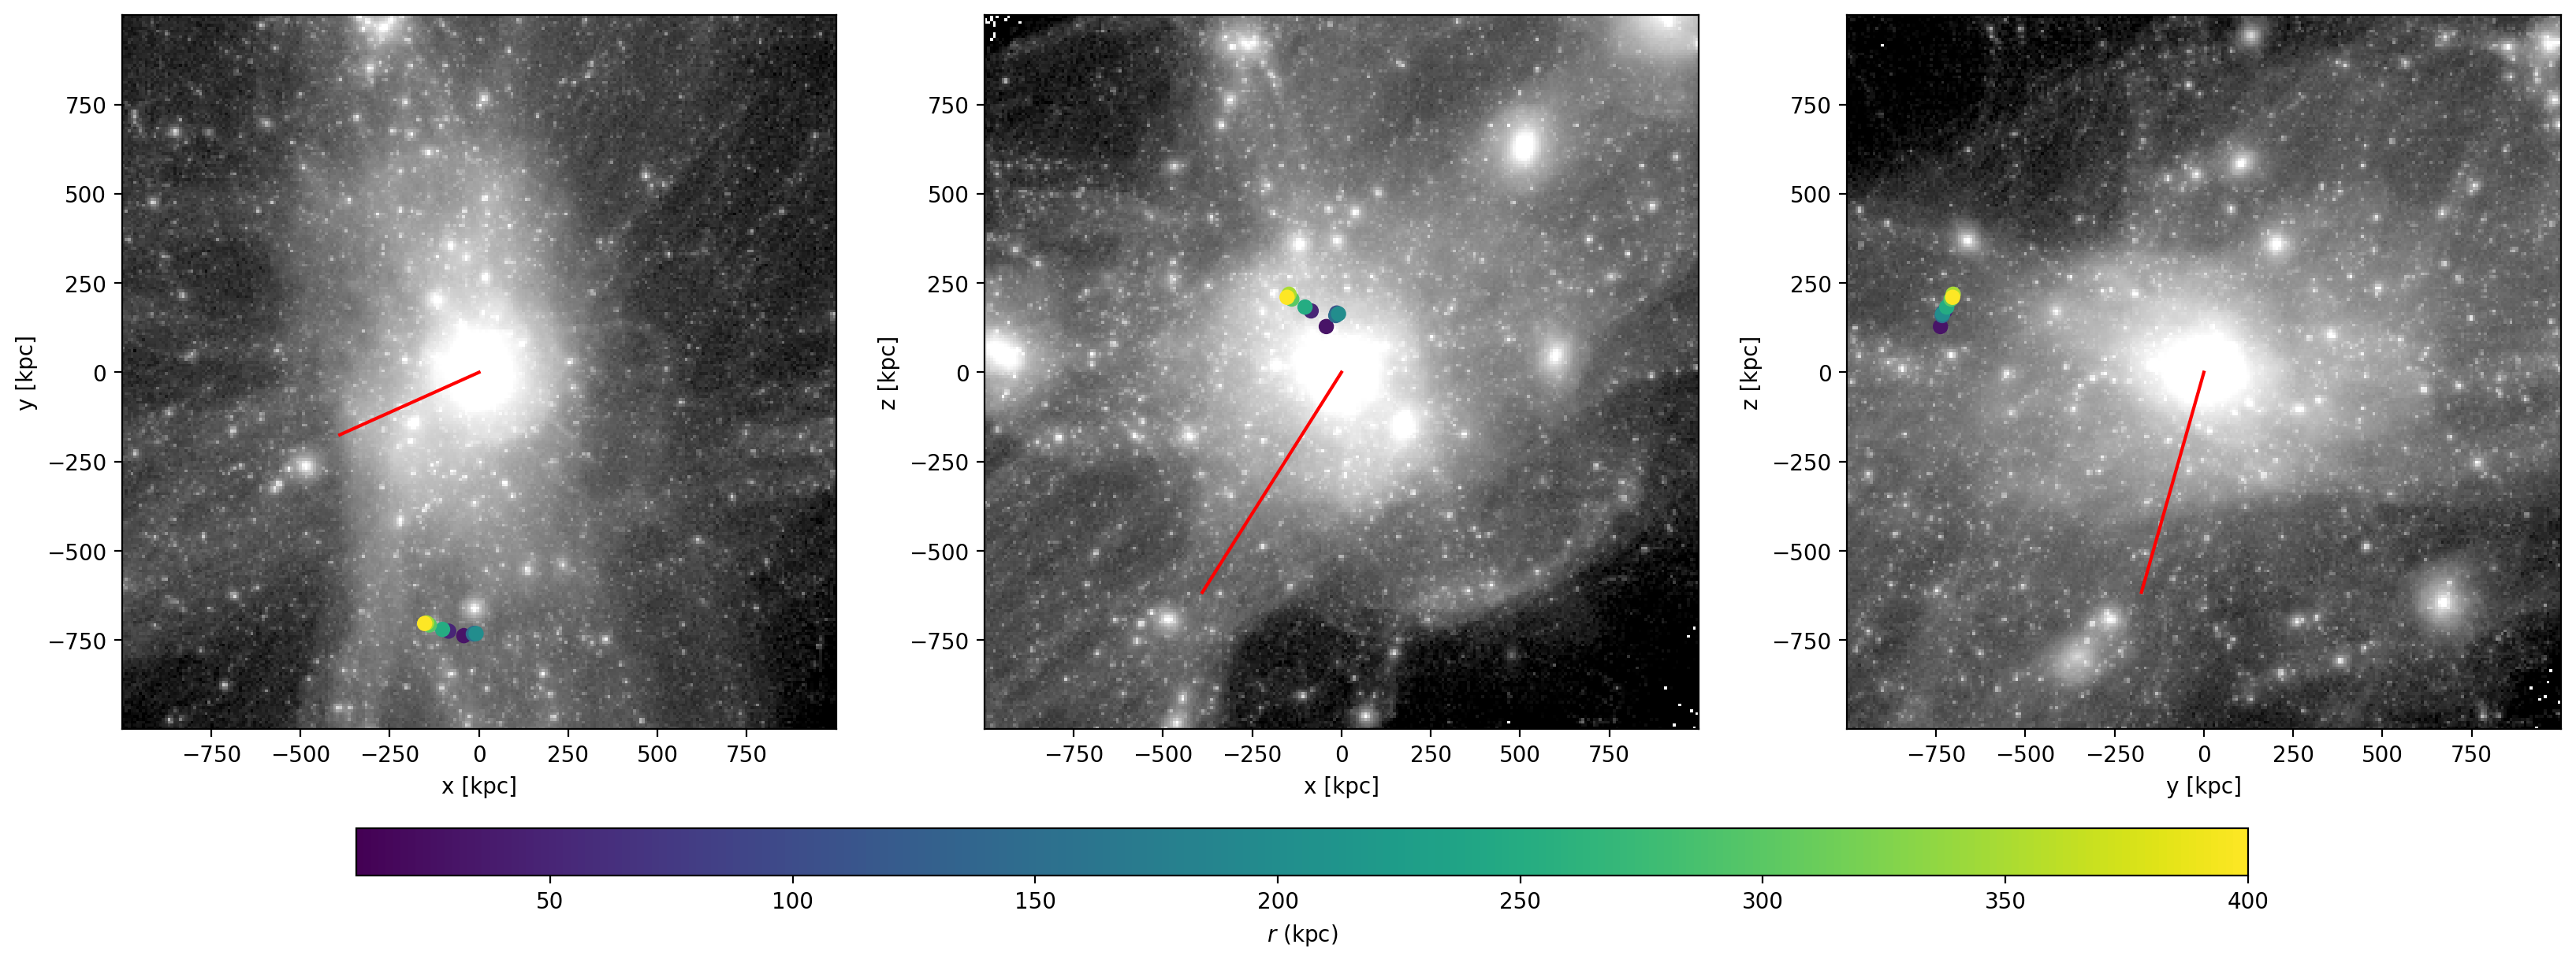

CPU times: user 11.9 s, sys: 7.01 s, total: 18.9 s
Wall time: 18.7 s


In [78]:
%%time
fig, axs = plt.subplots(1,3,figsize=(20,6), dpi=200)

(xy, xz, yz) = axs

xy.hist2d(
    pos_dark[:, 0][xym],
    pos_dark[:, 1][xym],
    bins=bins,
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
    cmap="binary_r"
)

xz.hist2d(
    pos_dark[:, 0][xzm],
    pos_dark[:, 2][xzm],
    bins=bins,
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
    cmap="binary_r"
)

yz.hist2d(
    pos_dark[:, 1][yzm],
    pos_dark[:, 2][yzm],
    bins=bins,
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
    cmap="binary_r"
)

focus = xy.scatter(
    k*maj_axs_corrected[:, 0],
    k*maj_axs_corrected[:, 1],
    c=r
)

xz.scatter(
    k*maj_axs_corrected[:, 0],
    k*maj_axs_corrected[:, 2],
    c=r
)

yz.scatter(
    k*maj_axs_corrected[:, 1],
    k*maj_axs_corrected[:, 2],
    c=r
)

xy.plot(
    [0, k*L[0]],
    [0, k*L[1]],
    c='r'
)

xz.plot(
    [0, k*L[0]],
    [0, k*L[2]],
    c='r'
)

yz.plot(
    [0, k*L[1]],
    [0, k*L[2]],
    c='r'
)

xy.set_aspect(1)
xz.set_aspect(1)
yz.set_aspect(1)

xy.set_xlabel("x [kpc]")
xz.set_xlabel("x [kpc]")
yz.set_xlabel("y [kpc]")

xy.set_ylabel("y [kpc]")
xz.set_ylabel("z [kpc]")
yz.set_ylabel("z [kpc]")

cax = fig.add_axes([0.5 - (0.6 / 2), -0.03, 0.6, 0.05])

plt.colorbar(focus, cax=cax, orientation="horizontal", label="$r$ (kpc)")

xy.legend()

plt.show()